# Deep Learning Assignment
~ By Guardians of The Galaxy

# Experiment Setup: Neural Network Architecture and Dataset

## Neural Network Architecture
In this experiment, we use a simple neural network (NN) model to explore the effects of different weight initialization strategies and cost functions on the training performance of the network. The architecture we are using is a basic feed-forward neural network with one hidden layer. Below is a detailed description of the model:

- Input Layer: The network takes an input of size 4, which corresponds to the four features of each data sample in the Iris dataset (sepal length, sepal width, petal length, petal width).

- Hidden Layer: The network has a hidden layer with 10 neurons. This layer uses the ReLU (Rectified Linear Unit) activation function, which is commonly used in deep learning to introduce non-linearity and enable the network to learn more complex patterns.

- Output Layer: The output layer consists of 2 neurons, as we are working with a binary classification task (classifying Iris species as either setosa or versicolor). The output layer uses the softmax activation function, which ensures that the output is a probability distribution across the classes (setosa and versicolor).


### The model's architecture is as follows:

- Input Layer: 4 neurons (corresponding to the 4 features in the dataset)
- Hidden Layer: 10 neurons
- Output Layer: 2 neurons (for binary classification)

This simple feed-forward neural network (fully connected) will allow us to experiment with various weight initialization strategies and cost functions, helping us understand their impact on convergence and model performance.

------------------------------------
## Dataset
For this experiment, we use the Iris dataset, which is a well-known dataset in machine learning. The dataset consists of 150 samples from 3 species of Iris flowers: setosa, versicolor, and virginica. Each sample has four features:

- Sepal length
- Sepal width
- Petal length
- Petal width

The task is to classify the flowers into one of three species based on these features. However, to simplify the task and focus on binary classification, we limit the dataset to only the first two classes: setosa (0) and versicolor (1). This means the target variable y will have two classes, which is suitable for binary classification.

### Dataset Preprocessing:
Feature Scaling: Since the features are on different scales (e.g., sepal length vs petal length), we apply standardization using the StandardScaler to ensure that all features have zero mean and unit variance. This helps the neural network train more effectively, as it prevents certain features from dominating others due to their scale.

Train-Test Split: The dataset is split into training and testing sets using an 80-20 ratio. This means 80% of the data is used for training the neural network, and the remaining 20% is reserved for testing the model's performance on unseen data.

Tensor Conversion: Since we will be using PyTorch for training the model, we convert the data into PyTorch tensors. This allows us to efficiently compute gradients and perform backpropagation during training.


## Imports

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import time
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import torch
import torch.nn as nn
import torch.optim as optim
import time
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## Loading and preparing the dataset

In [ ]:
# Load dataset
iris = load_iris()
X, y = iris.data, iris.target
X, y = X[y < 2], y[y < 2]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train, X_test = scaler.fit_transform(X_train), scaler.transform(X_test)

# Convert to tensors
X_train, X_test = torch.tensor(X_train, dtype=torch.float32), torch.tensor(X_test, dtype=torch.float32)
y_train, y_test = torch.tensor(y_train, dtype=torch.long), torch.tensor(y_test, dtype=torch.long)


# Experiment Design

In this experiment, we will investigate the impact of different weight initializations and cost functions on neural network training. By combining each of the three weight initialization strategies (Constant, Uniform, Xavier Normal) with both cost functions (Cross Entropy and NLL Loss), we can observe how these choices affect convergence speed, training stability, and overall model performance. This comprehensive evaluation will help us determine the optimal configuration for our specific neural network architecture and dataset.

## Weight Initialization Techniques Used:

1. Constant Initialization
Constant initialization sets all weights to a specific value. This approach is simple to implement and provides a baseline for comparison. However, using a constant value can lead to symmetry issues during training—where neurons learn the same features—and might hinder convergence since all neurons start with identical gradients. It’s often used as a sanity check rather than a robust initialization strategy.

2. Uniform Initialization
Uniform initialization assigns weights by drawing values from a uniform distribution, typically within a specified range. This method introduces randomness, breaking symmetry and allowing neurons to learn distinct features. The advantage of this approach is its simplicity and effectiveness in many scenarios. On the downside, if the range is not carefully chosen, it might lead to problems like vanishing or exploding gradients, especially in deep networks.

3. Xavier Normal Initialization
Xavier Normal initialization (also known as Glorot Normal) is designed to maintain the variance of activations across layers by drawing weights from a normal distribution scaled according to the number of input and output neurons. This strategy can significantly improve convergence in deep networks by mitigating issues such as vanishing or exploding gradients. However, it assumes certain conditions about the activation functions and might not perform as well when these conditions are not met, such as with some variants of ReLU.

## Cost Functions Used:

1. Cross Entropy Loss
Cross entropy loss is widely used for classification tasks as it measures the difference between the predicted probability distribution and the true distribution. Its major advantage is that it penalizes incorrect predictions more heavily when the model is confident, often leading to faster and more stable convergence. A potential drawback is that it can be sensitive to class imbalances and might require careful handling in such scenarios.

2. Negative Log Likelihood (NLL) Loss
Negative Log Likelihood (NLL) loss is closely related to cross entropy loss and is typically used in conjunction with log-softmax outputs. This loss function is particularly well-suited for probabilistic classification, offering a mathematically sound measure of performance. The advantages include its clear probabilistic interpretation and effectiveness in many applications. However, NLL loss requires careful numerical handling to avoid instability, and its performance can depend on how well the log-softmax normalization is implemented.



# Experiment 1: Constant Weight Initialization with CrossEntropy Loss

Training Details:

- Optimizer: Adam
- Learning Rate: 0.01
- Loss Function: CrossEntropyLoss
  - Internally handles softmax computation for multi-class classification.
- Epochs: Up to 100 epochs
- Early Stopping: Training stops if the change in loss is below 0.001, indicating convergence.

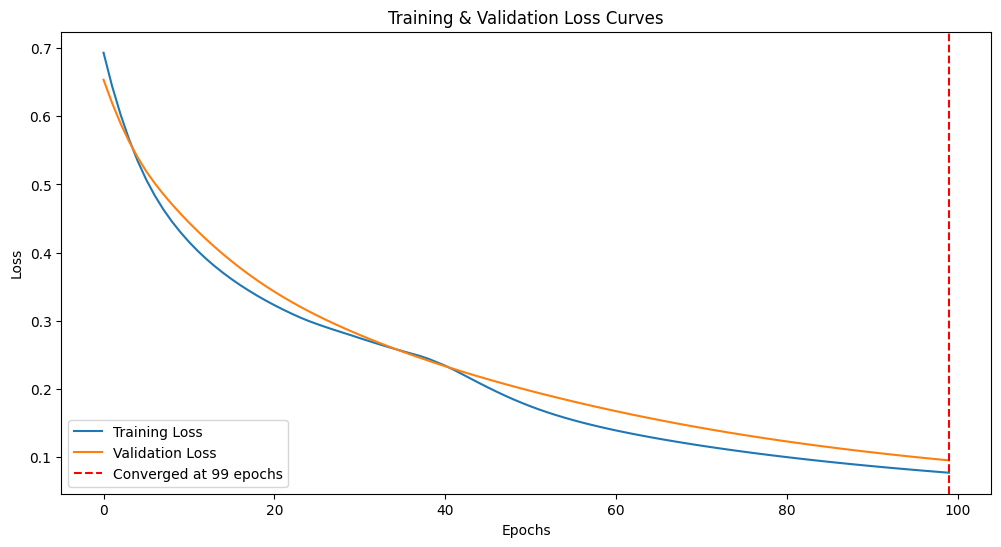

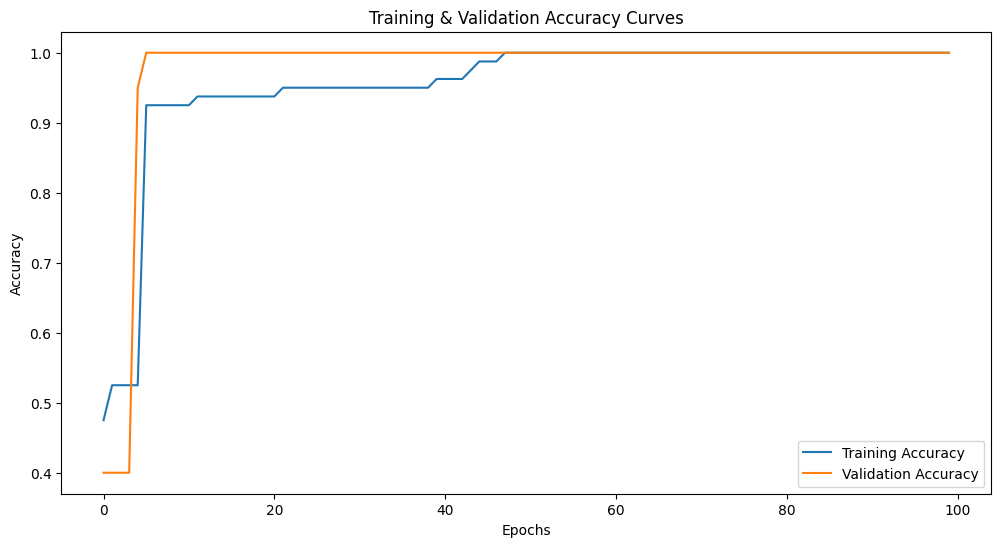

Performance Metrics for Constant Initialization + CrossEntropy Loss:
Final Training Accuracy: 1.0000
Final Validation Accuracy: 1.0000
Training Time: 0.67 seconds
Converged at epoch: 99


In [ ]:

# Define the neural network class with constant weight initialization
class Constant_CE_NN(nn.Module):
    def __init__(self):
        super(Constant_CE_NN, self).__init__()
        self.fc1 = nn.Linear(4, 10)  # 4 input features, 10 neurons in hidden layer
        self.fc2 = nn.Linear(10, 2)  # 10 neurons in hidden layer, 2 output classes
        self.initialize_weights()  # Initialize weights with constant value

    def initialize_weights(self):
        nn.init.constant_(self.fc1.weight, 0.5)
        nn.init.constant_(self.fc2.weight, 0.5)
        nn.init.zeros_(self.fc1.bias)
        nn.init.zeros_(self.fc2.bias)

    def forward(self, x):
        x = torch.relu(self.fc1(x))  # ReLU activation in hidden layer
        x = self.fc2(x)  # Output layer (no activation function here)
        return x  # Output logits for CrossEntropy loss

# Training function with validation tracking
def train_Constant_CE(X_train, y_train, X_test, y_test, max_epochs=100, early_stop_threshold=0.001):
    model = Constant_CE_NN()
    optimizer = optim.Adam(model.parameters(), lr=0.01)
    criterion = nn.CrossEntropyLoss()

    loss_history, val_loss_history = [], []
    accuracy_history, val_accuracy_history = [], []
    start_time = time.time()
    best_loss = float('inf')
    convergence_epoch_1_1 = max_epochs

    for epoch in range(max_epochs):
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

        with torch.no_grad():
            val_outputs = model(X_test)
            val_loss = criterion(val_outputs, y_test)
            predictions = torch.argmax(outputs, dim=1).numpy()
            val_predictions = torch.argmax(val_outputs, dim=1).numpy()

            accuracy = accuracy_score(y_train.numpy(), predictions)
            val_accuracy = accuracy_score(y_test.numpy(), val_predictions)

        loss_history.append(loss.item())
        val_loss_history.append(val_loss.item())
        accuracy_history.append(accuracy)
        val_accuracy_history.append(val_accuracy)

        # Check for convergence
        if abs(loss.item() - best_loss) < early_stop_threshold:
            convergence_epoch_1_1 = epoch
            break
        best_loss = loss.item()

    time_taken = time.time() - start_time
    return model, loss_history, val_loss_history, accuracy_history, val_accuracy_history, time_taken, convergence_epoch_1_1

# Train the model and store results
model_CE_Const, loss_CE_Const, val_loss_CE_Const, accuracy_CE_Const, val_accuracy_CE_Const, time_CE_Const, convergence_epoch_1_1 = train_Constant_CE(X_train, y_train, X_test, y_test)

# Plot Loss Curves
plt.figure(figsize=(12, 6))
plt.plot(loss_CE_Const, label="Training Loss")
plt.plot(val_loss_CE_Const, label="Validation Loss")
plt.axvline(x=convergence_epoch_1_1, color='r', linestyle='--', label=f'Converged at {convergence_epoch_1_1} epochs')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training & Validation Loss Curves")
plt.legend()
plt.show()

# Plot Accuracy Curves
plt.figure(figsize=(12, 6))
plt.plot(accuracy_CE_Const, label="Training Accuracy")
plt.plot(val_accuracy_CE_Const, label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training & Validation Accuracy Curves")
plt.legend()
plt.show()

# Print Final Performance Metrics
print("Performance Metrics for Constant Initialization + CrossEntropy Loss:")
print(f"Final Training Accuracy: {accuracy_CE_Const[-1]:.4f}")
print(f"Final Validation Accuracy: {val_accuracy_CE_Const[-1]:.4f}")
print(f"Training Time: {time_CE_Const:.2f} seconds")
print(f"Converged at epoch: {convergence_epoch_1_1}")


# Experiment 2: Constant Initialization + NLL Loss

Training Details:

- Optimizer: Adam
- Learning Rate: 0.01
- Loss Function: NLLLoss
  - Requires log_softmax on network outputs to produce log-probabilities.
- Epochs: Up to 100 epochs
- Early Stopping: Training stops if the change in loss is below 0.001, indicating convergence.

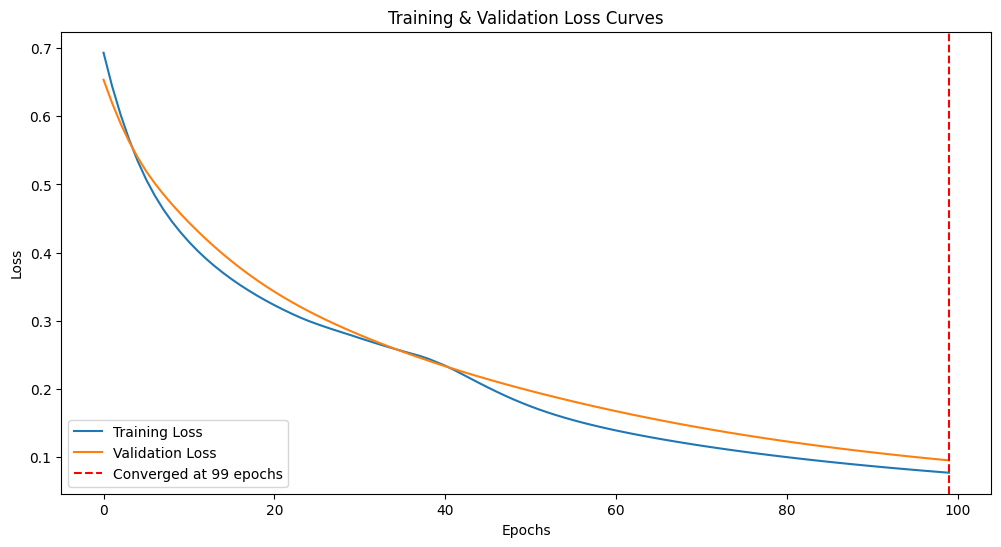

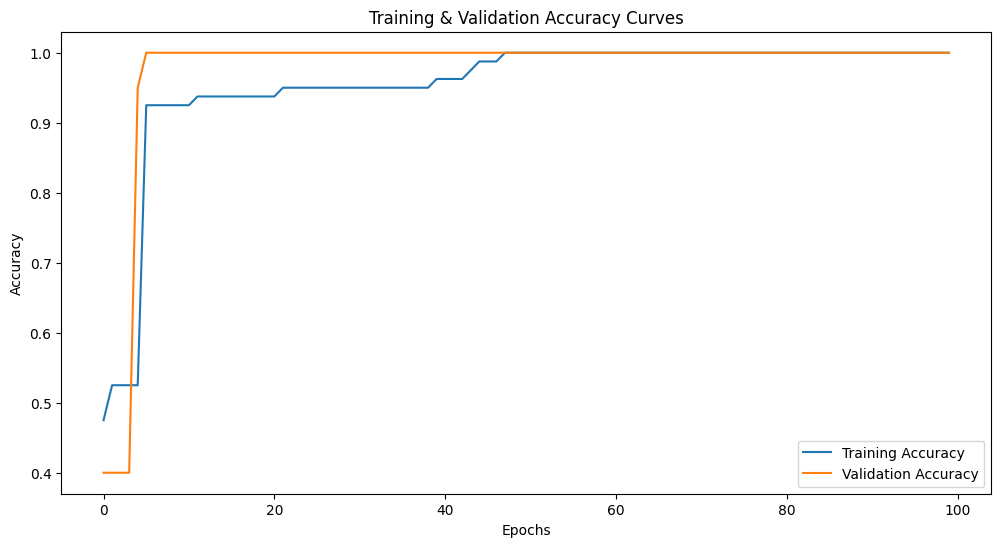

Performance Metrics for Constant Initialization + NLL Loss:
Final Training Accuracy: 1.0000
Final Validation Accuracy: 1.0000
Training Time: 0.22 seconds
Converged at epoch: 99


In [ ]:
# Define the neural network class with constant weight initialization
class Constant_NLL_NN(nn.Module):
    def __init__(self):
        super(Constant_NLL_NN, self).__init__()
        self.fc1 = nn.Linear(4, 10)
        self.fc2 = nn.Linear(10, 2)
        self.initialize_weights()

    def initialize_weights(self):
        nn.init.constant_(self.fc1.weight, 0.5)
        nn.init.constant_(self.fc2.weight, 0.5)
        nn.init.zeros_(self.fc1.bias)
        nn.init.zeros_(self.fc2.bias)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

# Training function with validation tracking
def train_Constant_NLL(X_train, y_train, X_test, y_test, max_epochs=100, early_stop_threshold=0.001):
    model = Constant_NLL_NN()
    optimizer = optim.Adam(model.parameters(), lr=0.01)
    criterion = nn.NLLLoss()

    loss_history, val_loss_history = [], []
    accuracy_history, val_accuracy_history = [], []
    start_time = time.time()
    best_loss = float('inf')
    convergence_epoch_2 = max_epochs

    for epoch in range(max_epochs):
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

        with torch.no_grad():
            val_outputs = model(X_test)
            val_loss = criterion(val_outputs, y_test)
            predictions = torch.argmax(outputs, dim=1).numpy()
            val_predictions = torch.argmax(val_outputs, dim=1).numpy()

            accuracy = accuracy_score(y_train.numpy(), predictions)
            val_accuracy = accuracy_score(y_test.numpy(), val_predictions)

        loss_history.append(loss.item())
        val_loss_history.append(val_loss.item())
        accuracy_history.append(accuracy)
        val_accuracy_history.append(val_accuracy)

        if abs(loss.item() - best_loss) < early_stop_threshold:
            convergence_epoch_2 = epoch
            break
        best_loss = loss.item()

    time_taken = time.time() - start_time
    return model, loss_history, val_loss_history, accuracy_history, val_accuracy_history, time_taken, convergence_epoch_2

# Train the model and store results
model_NLL_Const, loss_NLL_Const, val_loss_NLL_Const, accuracy_NLL_Const, val_accuracy_NLL_Const, time_NLL_Const, convergence_epoch_2 = train_Constant_NLL(X_train, y_train, X_test, y_test)

# Plot Loss Curves
plt.figure(figsize=(12, 6))
plt.plot(loss_NLL_Const, label="Training Loss")
plt.plot(val_loss_NLL_Const, label="Validation Loss")
plt.axvline(x=convergence_epoch_2, color='r', linestyle='--', label=f'Converged at {convergence_epoch_2} epochs')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training & Validation Loss Curves")
plt.legend()
plt.show()

# Plot Accuracy Curves
plt.figure(figsize=(12, 6))
plt.plot(accuracy_NLL_Const, label="Training Accuracy")
plt.plot(val_accuracy_NLL_Const, label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training & Validation Accuracy Curves")
plt.legend()
plt.show()

# Print Final Performance Metrics
print("Performance Metrics for Constant Initialization + NLL Loss:")
print(f"Final Training Accuracy: {accuracy_NLL_Const[-1]:.4f}")
print(f"Final Validation Accuracy: {val_accuracy_NLL_Const[-1]:.4f}")
print(f"Training Time: {time_NLL_Const:.2f} seconds")
print(f"Converged at epoch: {convergence_epoch_2}")

# Experiment 3: Uniform Weight Initialization with CrossEntropy Loss

Training Details:

- Optimizer: Adam
- Learning Rate: 0.01
- Loss Function: CrossEntropyLoss
  - Internally handles softmax computation for multi-class classification.
- Epochs: Up to 100 epochs
- Early Stopping: Training stops if the change in loss is below 0.001, indicating convergence.

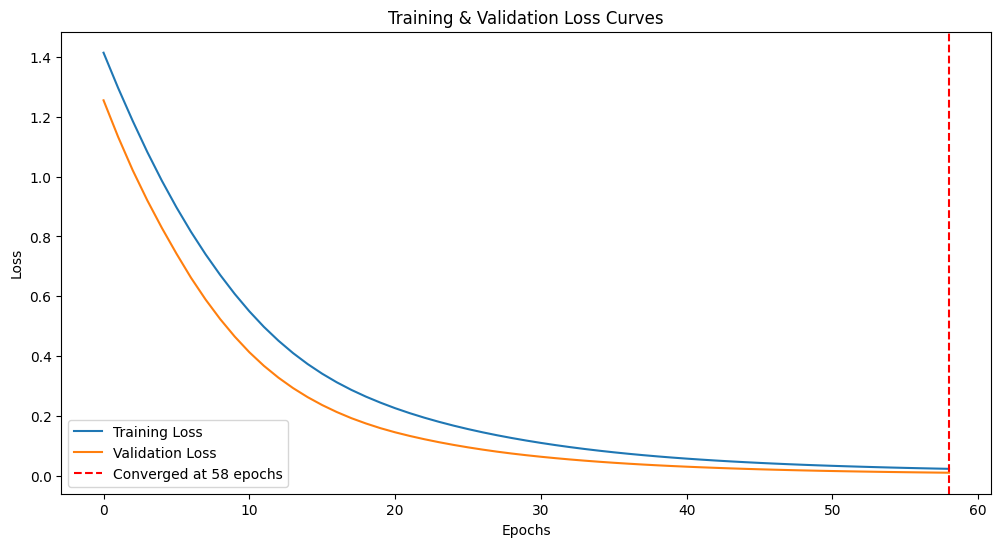

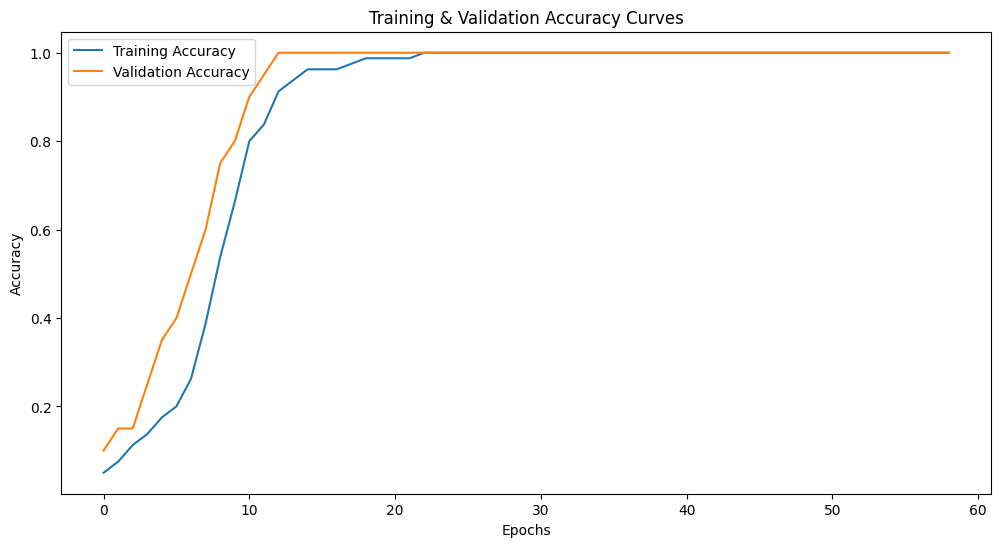

Performance Metrics for Uniform Initialization + CrossEntropy Loss:
Final Training Accuracy: 1.0000
Final Validation Accuracy: 1.0000
Training Time: 0.14 seconds
Converged at epoch: 58


In [ ]:
# Define the neural network class with uniform weight initialization
class Uniform_CE_NN(nn.Module):
    def __init__(self):
        super(Uniform_CE_NN, self).__init__()
        self.fc1 = nn.Linear(4, 10)
        self.fc2 = nn.Linear(10, 2)
        self.initialize_weights()

    def initialize_weights(self):
        nn.init.uniform_(self.fc1.weight, -1, 1)
        nn.init.uniform_(self.fc2.weight, -1, 1)
        nn.init.zeros_(self.fc1.bias)
        nn.init.zeros_(self.fc2.bias)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Training function with validation tracking
def train_Uniform_CE(X_train, y_train, X_test, y_test, max_epochs=100, early_stop_threshold=0.001):
    model = Uniform_CE_NN()
    optimizer = optim.Adam(model.parameters(), lr=0.01)
    criterion = nn.CrossEntropyLoss()

    loss_history, val_loss_history = [], []
    accuracy_history, val_accuracy_history = [], []
    start_time = time.time()
    best_loss = float('inf')
    convergence_epoch_3 = max_epochs

    for epoch in range(max_epochs):
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

        with torch.no_grad():
            val_outputs = model(X_test)
            val_loss = criterion(val_outputs, y_test)
            predictions = torch.argmax(outputs, dim=1).numpy()
            val_predictions = torch.argmax(val_outputs, dim=1).numpy()

            accuracy = accuracy_score(y_train.numpy(), predictions)
            val_accuracy = accuracy_score(y_test.numpy(), val_predictions)

        loss_history.append(loss.item())
        val_loss_history.append(val_loss.item())
        accuracy_history.append(accuracy)
        val_accuracy_history.append(val_accuracy)

        if abs(loss.item() - best_loss) < early_stop_threshold:
            convergence_epoch_3 = epoch
            break
        best_loss = loss.item()

    time_taken = time.time() - start_time
    return model, loss_history, val_loss_history, accuracy_history, val_accuracy_history, time_taken, convergence_epoch_3

# Train the model and store results
model_CE_Uniform, loss_CE_Uniform, val_loss_CE_Uniform, accuracy_CE_Uniform, val_accuracy_CE_Uniform, time_CE_Uniform, convergence_epoch_3 = train_Uniform_CE(X_train, y_train, X_test, y_test)

# Plot Loss Curves
plt.figure(figsize=(12, 6))
plt.plot(loss_CE_Uniform, label="Training Loss")
plt.plot(val_loss_CE_Uniform, label="Validation Loss")
plt.axvline(x=convergence_epoch_3, color='r', linestyle='--', label=f'Converged at {convergence_epoch_3} epochs')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training & Validation Loss Curves")
plt.legend()
plt.show()

# Plot Accuracy Curves
plt.figure(figsize=(12, 6))
plt.plot(accuracy_CE_Uniform, label="Training Accuracy")
plt.plot(val_accuracy_CE_Uniform, label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training & Validation Accuracy Curves")
plt.legend()
plt.show()

# Print Final Performance Metrics
print("Performance Metrics for Uniform Initialization + CrossEntropy Loss:")
print(f"Final Training Accuracy: {accuracy_CE_Uniform[-1]:.4f}")
print(f"Final Validation Accuracy: {val_accuracy_CE_Uniform[-1]:.4f}")
print(f"Training Time: {time_CE_Uniform:.2f} seconds")
print(f"Converged at epoch: {convergence_epoch_3}")


# Experiment 4: Uniform Weight Initialization with NLL Loss

Training Details:

- Optimizer: Adam
- Learning Rate: 0.01
- Loss Function: NLLLoss
  - Requires log_softmax on network outputs to produce log-probabilities.
- Epochs: Up to 100 epochs
- Early Stopping: Training stops if the change in loss is below 0.001, indicating convergence.

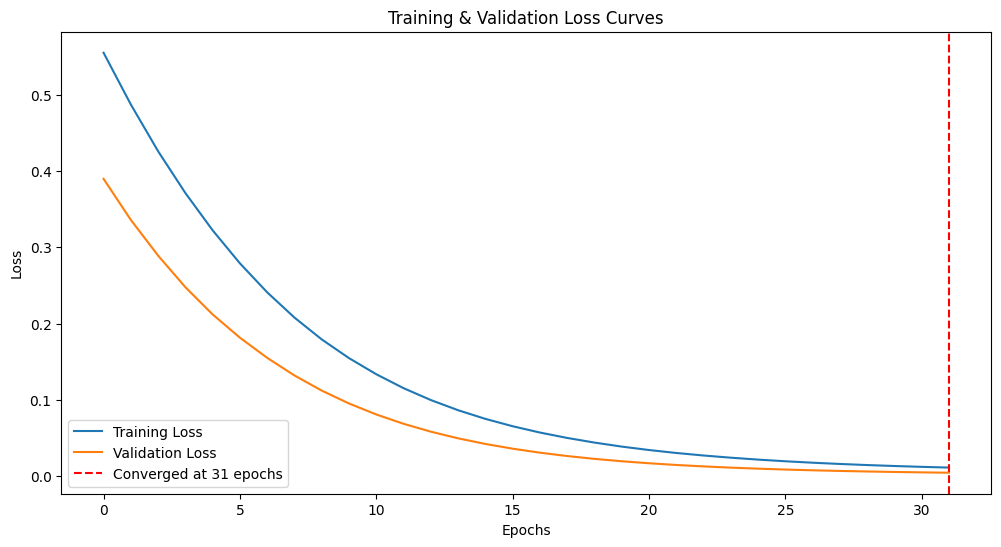

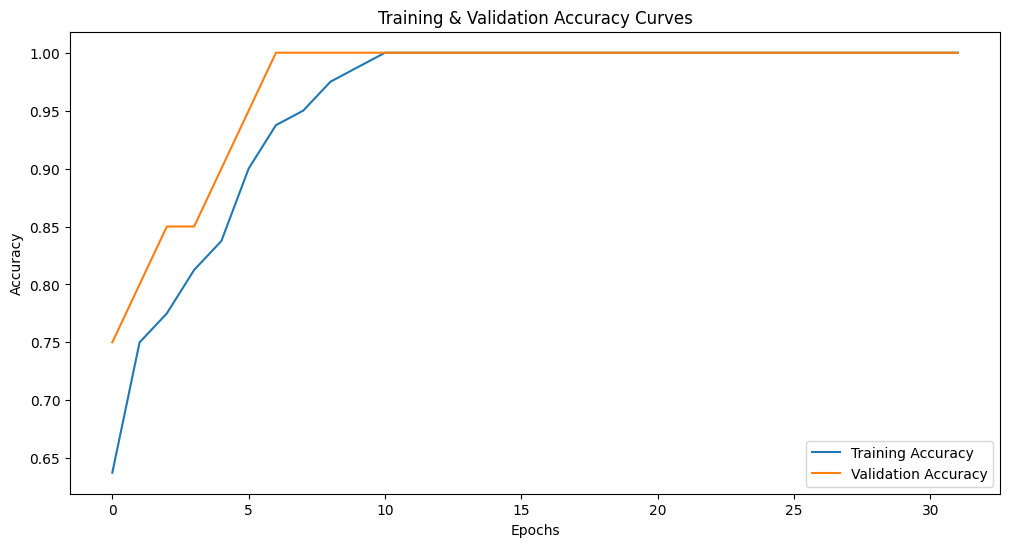

Performance Metrics for Uniform Initialization + NLL Loss:
Final Training Accuracy: 1.0000
Final Validation Accuracy: 1.0000
Training Time: 0.11 seconds
Converged at epoch: 31


In [ ]:
# Define the neural network class with uniform weight initialization
class Uniform_NLL_NN(nn.Module):
    def __init__(self):
        super(Uniform_NLL_NN, self).__init__()
        self.fc1 = nn.Linear(4, 10)
        self.fc2 = nn.Linear(10, 2)
        self.initialize_weights()

    def initialize_weights(self):
        nn.init.uniform_(self.fc1.weight, -1, 1)
        nn.init.uniform_(self.fc2.weight, -1, 1)
        nn.init.zeros_(self.fc1.bias)
        nn.init.zeros_(self.fc2.bias)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

# Training function with validation tracking
def train_Uniform_NLL(X_train, y_train, X_test, y_test, max_epochs=100, early_stop_threshold=0.001):
    model = Uniform_NLL_NN()
    optimizer = optim.Adam(model.parameters(), lr=0.01)
    criterion = nn.NLLLoss()

    loss_history, val_loss_history = [], []
    accuracy_history, val_accuracy_history = [], []
    start_time = time.time()
    best_loss = float('inf')
    convergence_epoch_4 = max_epochs

    for epoch in range(max_epochs):
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

        with torch.no_grad():
            val_outputs = model(X_test)
            val_loss = criterion(val_outputs, y_test)
            predictions = torch.argmax(outputs, dim=1).numpy()
            val_predictions = torch.argmax(val_outputs, dim=1).numpy()

            accuracy = accuracy_score(y_train.numpy(), predictions)
            val_accuracy = accuracy_score(y_test.numpy(), val_predictions)

        loss_history.append(loss.item())
        val_loss_history.append(val_loss.item())
        accuracy_history.append(accuracy)
        val_accuracy_history.append(val_accuracy)

        if abs(loss.item() - best_loss) < early_stop_threshold:
            convergence_epoch_4 = epoch
            break
        best_loss = loss.item()

    time_taken = time.time() - start_time
    return model, loss_history, val_loss_history, accuracy_history, val_accuracy_history, time_taken, convergence_epoch_4

# Train the model and store results
model_NLL_Uniform, loss_NLL_Uniform, val_loss_NLL_Uniform, accuracy_NLL_Uniform, val_accuracy_NLL_Uniform, time_NLL_Uniform, convergence_epoch_4 = train_Uniform_NLL(X_train, y_train, X_test, y_test)

# Plot Loss Curves
plt.figure(figsize=(12, 6))
plt.plot(loss_NLL_Uniform, label="Training Loss")
plt.plot(val_loss_NLL_Uniform, label="Validation Loss")
plt.axvline(x=convergence_epoch_4, color='r', linestyle='--', label=f'Converged at {convergence_epoch_4} epochs')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training & Validation Loss Curves")
plt.legend()
plt.show()

# Plot Accuracy Curves
plt.figure(figsize=(12, 6))
plt.plot(accuracy_NLL_Uniform, label="Training Accuracy")
plt.plot(val_accuracy_NLL_Uniform, label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training & Validation Accuracy Curves")
plt.legend()
plt.show()

# Print Final Performance Metrics
print("Performance Metrics for Uniform Initialization + NLL Loss:")
print(f"Final Training Accuracy: {accuracy_NLL_Uniform[-1]:.4f}")
print(f"Final Validation Accuracy: {val_accuracy_NLL_Uniform[-1]:.4f}")
print(f"Training Time: {time_NLL_Uniform:.2f} seconds")
print(f"Converged at epoch: {convergence_epoch_4}")


# Experiment 5: Xavier Normal Weight Initialization with CrossEntropy Loss

Training Details:

- Optimizer: Adam
- Learning Rate: 0.01
- Loss Function: CrossEntropyLoss
  - Internally handles softmax computation for multi-class classification.
- Epochs: Up to 100 epochs
- Early Stopping: Training stops if the change in loss is below 0.001, indicating convergence.

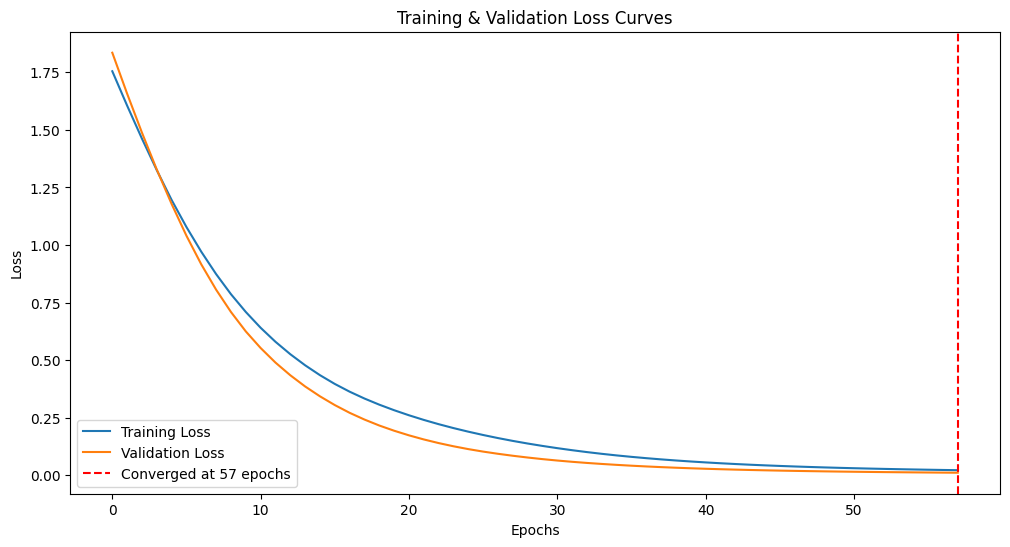

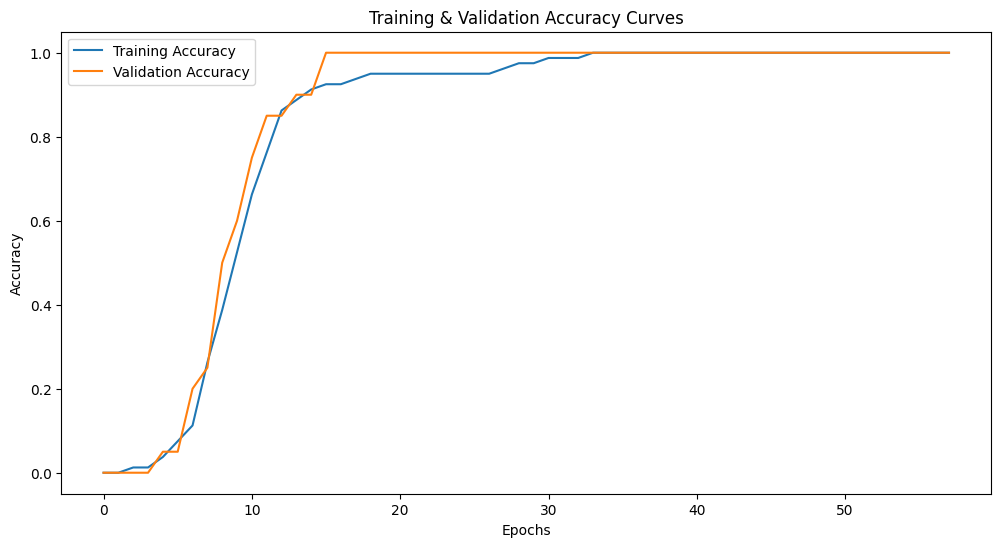

Performance Metrics for Xavier Initialization + CrossEntropy Loss:
Final Training Accuracy: 1.0000
Final Validation Accuracy: 1.0000
Training Time: 0.20 seconds
Converged at epoch: 57


In [ ]:
# Define the neural network class with Xavier weight initialization
class Xavier_CE_NN(nn.Module):
    def __init__(self):
        super(Xavier_CE_NN, self).__init__()
        self.fc1 = nn.Linear(4, 10)
        self.fc2 = nn.Linear(10, 2)
        self.initialize_weights()

    def initialize_weights(self):
        nn.init.xavier_normal_(self.fc1.weight)
        nn.init.xavier_normal_(self.fc2.weight)
        nn.init.zeros_(self.fc1.bias)
        nn.init.zeros_(self.fc2.bias)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Training function with validation tracking
def train_Xavier_CE(X_train, y_train, X_test, y_test, max_epochs=100, early_stop_threshold=0.001):
    model = Xavier_CE_NN()
    optimizer = optim.Adam(model.parameters(), lr=0.01)
    criterion = nn.CrossEntropyLoss()

    loss_history, val_loss_history = [], []
    accuracy_history, val_accuracy_history = [], []
    start_time = time.time()
    best_loss = float('inf')
    convergence_epoch_5 = max_epochs

    for epoch in range(max_epochs):
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

        with torch.no_grad():
            val_outputs = model(X_test)
            val_loss = criterion(val_outputs, y_test)
            predictions = torch.argmax(outputs, dim=1).numpy()
            val_predictions = torch.argmax(val_outputs, dim=1).numpy()

            accuracy = accuracy_score(y_train.numpy(), predictions)
            val_accuracy = accuracy_score(y_test.numpy(), val_predictions)

        loss_history.append(loss.item())
        val_loss_history.append(val_loss.item())
        accuracy_history.append(accuracy)
        val_accuracy_history.append(val_accuracy)

        if abs(loss.item() - best_loss) < early_stop_threshold:
            convergence_epoch_5 = epoch
            break
        best_loss = loss.item()

    time_taken = time.time() - start_time
    return model, loss_history, val_loss_history, accuracy_history, val_accuracy_history, time_taken, convergence_epoch_5

# Train the model and store results
model_CE_Xavier, loss_CE_Xavier, val_loss_CE_Xavier, accuracy_CE_Xavier, val_accuracy_CE_Xavier, time_CE_Xavier, convergence_epoch_5 = train_Xavier_CE(X_train, y_train, X_test, y_test)

# Plot Loss Curves
plt.figure(figsize=(12, 6))
plt.plot(loss_CE_Xavier, label="Training Loss")
plt.plot(val_loss_CE_Xavier, label="Validation Loss")
plt.axvline(x=convergence_epoch_5, color='r', linestyle='--', label=f'Converged at {convergence_epoch_5} epochs')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training & Validation Loss Curves")
plt.legend()
plt.show()

# Plot Accuracy Curves
plt.figure(figsize=(12, 6))
plt.plot(accuracy_CE_Xavier, label="Training Accuracy")
plt.plot(val_accuracy_CE_Xavier, label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training & Validation Accuracy Curves")
plt.legend()
plt.show()

# Print Final Performance Metrics
print("Performance Metrics for Xavier Initialization + CrossEntropy Loss:")
print(f"Final Training Accuracy: {accuracy_CE_Xavier[-1]:.4f}")
print(f"Final Validation Accuracy: {val_accuracy_CE_Xavier[-1]:.4f}")
print(f"Training Time: {time_CE_Xavier:.2f} seconds")
print(f"Converged at epoch: {convergence_epoch_5}")

# Experiment 6: Xavier Normal Weight Initialization with NLL Loss

Training Details:

- Optimizer: Adam
- Learning Rate: 0.01
- Loss Function: NLLLoss
  - Requires log_softmax on network outputs to produce log-probabilities.
- Epochs: Up to 100 epochs
- Early Stopping: Training stops if the change in loss is below 0.001, indicating convergence.

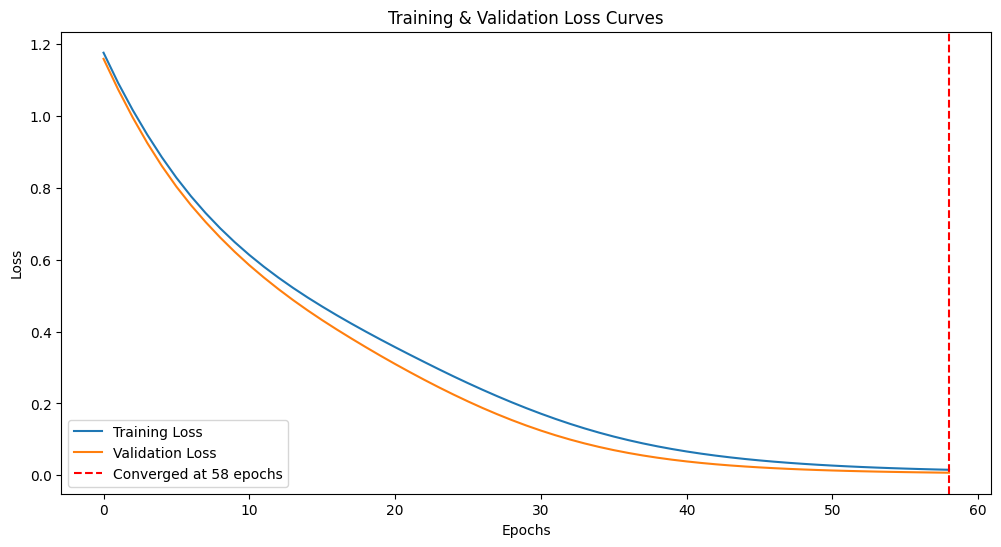

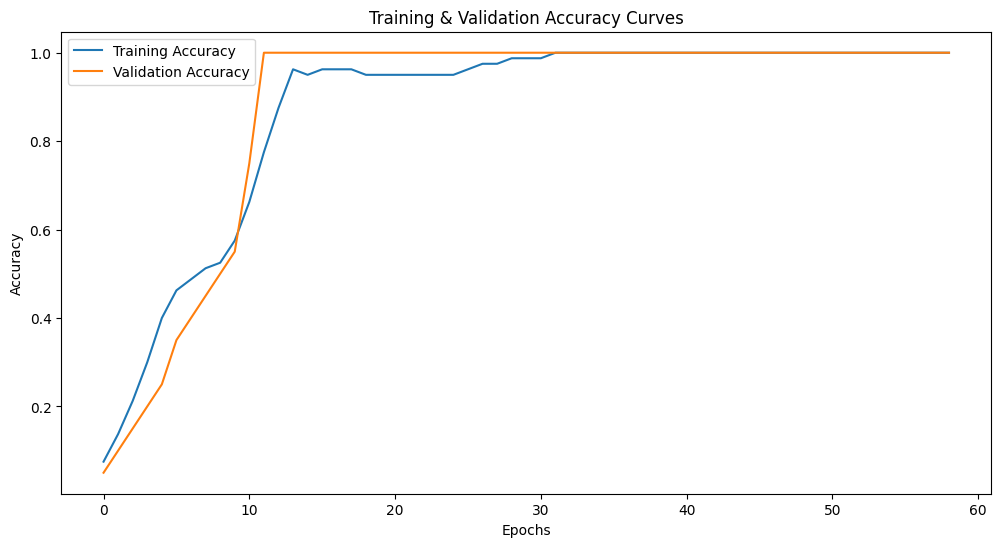

Performance Metrics for Xavier Initialization + NLL Loss:
Final Training Accuracy: 1.0000
Final Validation Accuracy: 1.0000
Training Time: 0.20 seconds
Converged at epoch: 58


In [ ]:
# Define the neural network class with Xavier weight initialization
class Xavier_NLL_NN(nn.Module):
    def __init__(self):
        super(Xavier_NLL_NN, self).__init__()
        self.fc1 = nn.Linear(4, 10)
        self.fc2 = nn.Linear(10, 2)
        self.initialize_weights()

    def initialize_weights(self):
        nn.init.xavier_normal_(self.fc1.weight)
        nn.init.xavier_normal_(self.fc2.weight)
        nn.init.zeros_(self.fc1.bias)
        nn.init.zeros_(self.fc2.bias)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

# Training function with validation tracking
def train_Xavier_NLL(X_train, y_train, X_test, y_test, max_epochs=100, early_stop_threshold=0.001):
    model = Xavier_NLL_NN()
    optimizer = optim.Adam(model.parameters(), lr=0.01)
    criterion = nn.NLLLoss()

    loss_history, val_loss_history = [], []
    accuracy_history, val_accuracy_history = [], []
    start_time = time.time()
    best_loss = float('inf')
    convergence_epoch_6 = max_epochs

    for epoch in range(max_epochs):
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

        with torch.no_grad():
            val_outputs = model(X_test)
            val_loss = criterion(val_outputs, y_test)
            predictions = torch.argmax(outputs, dim=1).numpy()
            val_predictions = torch.argmax(val_outputs, dim=1).numpy()

            accuracy = accuracy_score(y_train.numpy(), predictions)
            val_accuracy = accuracy_score(y_test.numpy(), val_predictions)

        loss_history.append(loss.item())
        val_loss_history.append(val_loss.item())
        accuracy_history.append(accuracy)
        val_accuracy_history.append(val_accuracy)

        if abs(loss.item() - best_loss) < early_stop_threshold:
            convergence_epoch_6 = epoch
            break
        best_loss = loss.item()

    time_taken = time.time() - start_time
    return model, loss_history, val_loss_history, accuracy_history, val_accuracy_history, time_taken, convergence_epoch_6

# Train the model and store results
model_NLL_Xavier, loss_NLL_Xavier, val_loss_NLL_Xavier, accuracy_NLL_Xavier, val_accuracy_NLL_Xavier, time_NLL_Xavier, convergence_epoch_6 = train_Xavier_NLL(X_train, y_train, X_test, y_test)

# Plot Loss Curves
plt.figure(figsize=(12, 6))
plt.plot(loss_NLL_Xavier, label="Training Loss")
plt.plot(val_loss_NLL_Xavier, label="Validation Loss")
plt.axvline(x=convergence_epoch_6, color='r', linestyle='--', label=f'Converged at {convergence_epoch_6} epochs')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training & Validation Loss Curves")
plt.legend()
plt.show()

# Plot Accuracy Curves
plt.figure(figsize=(12, 6))
plt.plot(accuracy_NLL_Xavier, label="Training Accuracy")
plt.plot(val_accuracy_NLL_Xavier, label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training & Validation Accuracy Curves")
plt.legend()
plt.show()

# Print Final Performance Metrics
print("Performance Metrics for Xavier Initialization + NLL Loss:")
print(f"Final Training Accuracy: {accuracy_NLL_Xavier[-1]:.4f}")
print(f"Final Validation Accuracy: {val_accuracy_NLL_Xavier[-1]:.4f}")
print(f"Training Time: {time_NLL_Xavier:.2f} seconds")
print(f"Converged at epoch: {convergence_epoch_6}")


# Experiments Performance Comparison

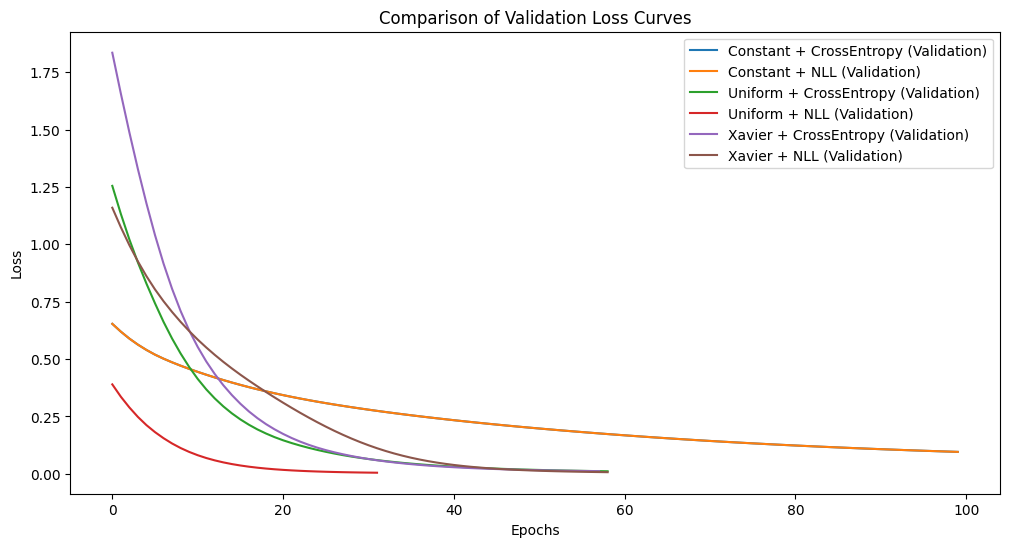

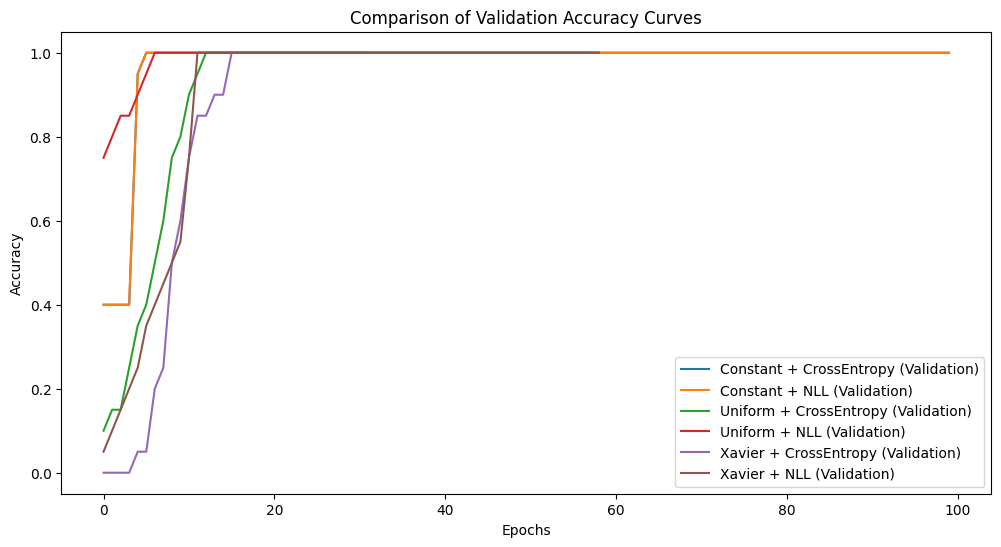

,Initialization + Loss Function,Final Validation Accuracy,Final Validation Loss,Training Time (s),Converged Epoch
0,Constant + CrossEntropy,1.0,0.095517,0.667471,99
1,Constant + NLL,1.0,0.095517,0.222832,99
2,Uniform + CrossEntropy,1.0,0.011073,0.136322,58
3,Uniform + NLL,1.0,0.004722,0.109831,31
4,Xavier + CrossEntropy,1.0,0.011487,0.199326,57
5,Xavier + NLL,1.0,0.007076,0.201597,58


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Creating a dictionary to store all experiment results
experiment_results = {
    "Constant + CrossEntropy": {
        "val_loss": val_loss_CE_Const, "val_acc": val_accuracy_CE_Const,
        "time": time_CE_Const, "convergence": convergence_epoch_1_1
    },
    "Constant + NLL": {
        "val_loss": val_loss_NLL_Const, "val_acc": val_accuracy_NLL_Const,
        "time": time_NLL_Const, "convergence": convergence_epoch_2
    },
    "Uniform + CrossEntropy": {
        "val_loss": val_loss_CE_Uniform, "val_acc": val_accuracy_CE_Uniform,
        "time": time_CE_Uniform, "convergence": convergence_epoch_3
    },
    "Uniform + NLL": {
        "val_loss": val_loss_NLL_Uniform, "val_acc": val_accuracy_NLL_Uniform,
        "time": time_NLL_Uniform, "convergence": convergence_epoch_4
    },
    "Xavier + CrossEntropy": {
        "val_loss": val_loss_CE_Xavier, "val_acc": val_accuracy_CE_Xavier,
        "time": time_CE_Xavier, "convergence": convergence_epoch_5
    },
    "Xavier + NLL": {
        "val_loss": val_loss_NLL_Xavier, "val_acc": val_accuracy_NLL_Xavier,
        "time": time_NLL_Xavier, "convergence": convergence_epoch_6
    }
}

# Plot Validation Loss Curves for Comparison
plt.figure(figsize=(12, 6))
for exp, data in experiment_results.items():
    plt.plot(data["val_loss"], label=f"{exp} (Validation)")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Comparison of Validation Loss Curves")
plt.legend()
plt.show()

# Plot Validation Accuracy Curves for Comparison
plt.figure(figsize=(12, 6))
for exp, data in experiment_results.items():
    plt.plot(data["val_acc"], label=f"{exp} (Validation)")

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Comparison of Validation Accuracy Curves")
plt.legend()
plt.show()

# Creating a comparison table of final performance metrics
comparison_table = pd.DataFrame({
    "Initialization + Loss Function": list(experiment_results.keys()),
    "Final Validation Accuracy": [data["val_acc"][-1] for data in experiment_results.values()],
    "Final Validation Loss": [data["val_loss"][-1] for data in experiment_results.values()],
    "Training Time (s)": [data["time"] for data in experiment_results.values()],
    "Converged Epoch": [data["convergence"] for data in experiment_results.values()]
})

# Displaying the comparison table
#print(comparison_table)  # Prints the table in the console

# If you're using Jupyter Notebook:
from IPython.display import display
display(comparison_table)

The results show that while all models achieved a final validation accuracy of 1.0, the efficiency of training varied. Constant initialization was the slowest, requiring 99 epochs to converge, while Uniform + NLL converged the fastest in just 31 epochs. In terms of validation loss, models using NLL generally performed better, with Uniform + NLL achieving the lowest loss (0.0047). Xavier initialization also showed strong performance, with its NLL variant reaching a final loss of 0.0070, reinforcing its reliability in deep learning.

Overall, while all methods eventually learned the dataset, Uniform + NLL proved to be the most efficient, achieving the fastest convergence and the lowest loss. This highlights the importance of selecting an appropriate initialization and loss function to optimize both training speed and performance.